#  Assignment 1
You are given $n$ documents (labels $\in \{-1,+1\}$), each consisting of $n_i$ words from some finite vocabulary $\mathsf{V=\{v_1,v_2,\dots,v_d\}}$ with size $d$.
We represent document $i$ by a vector 
$$
    \mathsf{\mathbf{x_i} = \begin{pmatrix} \mathsf{x_{i1}, x_{i2},\dots,x_{id},1 }\end{pmatrix}}
$$ where $x_{ij}=$ number of times that word $v_j$ appears in document $i$.
Now let matrix $X$ of size $n$ by $d+1$ where its $i$-th row is equal to $\mathbf{x_i}$; i.e.
$$
    \mathsf{X = \begin{pmatrix} \mathsf{x_{ij}} \end{pmatrix}_{i\in[n],j\in[d+1]}}
$$
also let vector $\mathbf{y} \in \{-1,+1\}^n$ be
$$
    \mathbf{y}=\begin{pmatrix} \mathsf{y_1 \\
                                   y_2 \\
                                   \dots \\
                                   y_n}
                                   \end{pmatrix}
$$
wher $y_i$ is the label of document $i$.
### Buidling $X$ and $\mathbf{y}$
You are given two text files
1. `train.txt`: training set (labeled documents)
2. `test.txt`: test set (unlabeled documents)

in `train.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{train}}$ 
- line $2i$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{train}}$)
- line $2i+1$ contain label for document $i$    ($i=1,2,\dots,n_{\mathrm{train}}$)

in `test.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{test}}$ 
- line $i+1$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{test}}$)

Now let's build $X_\mathrm{train}$,$X_\mathrm{test}$, and $\mathbf{y}_{\mathrm{train}}$ as defined above using `train.txt` and `test.txt`

### IMPORTANT
- Documents are numbered as they appear in the input file
- let Vocabulary $V=(v_1,v_2,\dots,v_d)$ be **sorted** list of all distinct word in the documents of **training** set.

In [128]:
import numpy as np  # Import NumPy library for array operations

# Initialize lists to store documents and labels
docs_train = []  # List to store training documents
labels = []      # List to store labels for training documents

# Read and process train.txt
with open('train.txt', 'r') as file:  # Open train.txt file for reading
    lines = file.readlines()  # Read all lines from the file
    for i, line in enumerate(lines):  # Iterate over each line and its index
        if i % 2 == 1:  # Odd lines contain document words (starting from index 1)
            docs_train.append(line.strip().split(" "))  # Split words by space and append to docs_train
        elif i > 0:  # Skip the first line which contains the number of documents
            labels.append(int(line.strip()))  # Convert label to integer and append to labels list
print(docs_train)
print(labels)
# Initialize list to store test documents
docs_test = []  # List to store testing documents

# Read and process test.txt
with open('test.txt', 'r') as file:  # Open test.txt file for reading
    lines = file.readlines()  # Read all lines from the file
    for i, line in enumerate(lines):  # Iterate over each line and its index
        if i > 0:  #Skip the first line which contains the number of documents
            docs_test.append(line.strip().split(" "))  # Split words by space and append to docs_test

# Compute lengths of train and test sets
n_train = len(docs_train)  # Number of documents in the training set
n_test = len(docs_test)    # Number of documents in the testing set
# Print example documents
print("Example document from training set:")
print(docs_train[40])  # Print the 41st document from the training set (indexing starts from 0)
print("Example document from test set:")
print(docs_test[40])   # Print the 41st document from the testing set (indexing starts from 0)

# CHECKS
assert((n_train + n_test) == 1500)  # Check if total number of documents is equal to 1500
assert(np.sum(np.array(labels)) == -348)  # Check if sum of labels is equal to -348
assert(len(docs_train[1]) + len(docs_test[1]) == 12)  # Check if length of second document in both sets is equal to 12


[['Rv', 'tgU', 'zY#tE'], ['Rv', 'tgU', 'dZJa', 'dZJa', 'tgU', 'ITZM', 'ITZM', 'ITZM'], ['tgU', 'tgU'], ['tgU', 'zY#tE', 'tgU', 'WAcqG', 'tgU', 'ITZM', 'iWgN', 'JgwBu', 'zY#tE'], ['dZJa', 'Rv', 'OnJECH', 'tgU', 'Rv', 'dZJa', 'ITZM'], ['iWgN', 'iWgN', 'iWgN', 'zY#tE', 'tgU'], ['Rv', 'Rv', 'tgU', 'ITZM', 'tgU', 'tgU', 'LnGi'], ['JgwBu', 'Rv', 'Rv'], ['iWgN', 'Rv', 'zY#tE', 'ITZM', 'LnGi'], ['JgwBu', 'iWgN', 'OnJECH', 'WAcqG', 'LnGi'], ['JgwBu', 'ITZM', 'iWgN', 'JgwBu', 'LnGi'], ['Rv', 'tgU', 'ITZM', 'tgU'], ['ITZM', 'zY#tE', 'WAcqG', 'zY#tE', 'iWgN', 'tgU', 'ITZM', 'OnJECH', 'ITZM', 'Rv'], ['ITZM', 'Rv', 'Rv', 'ITZM', 'tgU', 'dZJa', 'OnJECH', 'dZJa', 'ITZM'], ['iWgN', 'tgU', 'Rv'], ['tgU', 'JgwBu', 'tgU'], ['OnJECH', 'LnGi', 'iWgN', 'ITZM', 'tgU', 'ITZM', 'tgU'], ['OnJECH', 'tgU', 'zY#tE', 'LnGi', 'iWgN', 'iWgN', 'iWgN', 'LnGi', 'zY#tE', 'Rv'], ['tgU', 'tgU', 'Rv', 'tgU', 'Rv', 'tgU', 'iWgN', 'tgU', 'tgU'], ['tgU', 'WAcqG', 'zY#tE'], ['iWgN', 'Rv', 'iWgN', 'ITZM', 'Rv', 'iWgN'], ['Rv', 'i

In [129]:
def make_vocabulary(docs):
    lst=[]
    for i in docs:
        for j in i:
            if not(j in lst):
                lst.append(j)
    # Sort the set of unique words and return the sorted list
    return sorted(lst)      

# Call the make_vocabulary function with the training documents
vocab = make_vocabulary(docs_train)

# Compute the size of the vocabulary (number of unique words)
d = len(vocab)

# Create a dictionary that maps each word in the vocabulary to its index (position) in the list
w2i = {word: i for i, word in enumerate(vocab)}

# Print the sorted list of unique words in the vocabulary
print(vocab)

# Print the word-to-index dictionary
print(w2i)


['ITZM', 'JgwBu', 'LnGi', 'OnJECH', 'Rv', 'WAcqG', 'dZJa', 'iWgN', 'tgU', 'zY#tE']
{'ITZM': 0, 'JgwBu': 1, 'LnGi': 2, 'OnJECH': 3, 'Rv': 4, 'WAcqG': 5, 'dZJa': 6, 'iWgN': 7, 'tgU': 8, 'zY#tE': 9}


In [130]:
def make_matrix(docs, w2i):
    n = len(docs)
    d = len(w2i)
    matrix = np.zeros((n,d+1))
    matrix[:, -1] = 1  
    for i in range(n):
        dic = {}
        for j in docs[i]:
            if j in dic:
                dic[j] += 1
            else:
                dic[j] = 1
            # Update the corresponding entry in the matrix with the word frequency
            matrix[i][w2i[j]] = dic[j]
    return matrix
X_train = make_matrix(docs_train, w2i)  # Create the matrix X_train for the training set
X_test = make_matrix(docs_test, w2i)    # Create the matrix X_test for the test set
y_train = np.array(labels)              # Convert the labels list to a numpy array for training set

# Print the requested information for (ACT6-8)
print("First 5 rows of X_train: ")
print(X_train[:5])         # Print the first 5 rows of X_train
print("Last 5 rows of X_test: ")
print(X_test[-5:])         # Print the last 5 rows of X_test
print("First 10 labels of training set:")
print(labels[:10])         # Print the first 10 labels of the training set


First 5 rows of X_train: 
[[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
 [3. 0. 0. 0. 1. 0. 2. 0. 2. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0. 1. 3. 2. 1.]
 [1. 0. 0. 1. 2. 0. 2. 0. 1. 0. 1.]]
Last 5 rows of X_test: 
[[1. 0. 0. 0. 1. 0. 1. 0. 3. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 3. 0. 1.]
 [0. 0. 1. 0. 2. 1. 0. 0. 3. 0. 1.]
 [0. 1. 0. 1. 4. 0. 0. 2. 2. 0. 1.]
 [2. 1. 0. 1. 0. 0. 0. 2. 1. 0. 1.]]
First 10 labels of training set:
[-1, 1, -1, 1, -1, -1, 1, -1, -1, -1]


## Linear Predictor

Let $\mathbf{w} \in \mathbb{R}^{d+1}$, for a single document $\mathbf{x} \in \mathbb{R}^{d+1}$, our predicted label is
$$
    \mathsf{\hat{y} = \mathrm{sign}({\mathbf{w} \cdot \mathbf{y}})}
$$
where 
$$
    \displaystyle  \mathrm{sign}(\alpha) = \begin{cases} 
      +1 & \alpha \geq 0 \\
      -1 & \alpha < 0 \\
    \end{cases}
$$

Therefore, for documents matrix $X \in \mathbb{R}^{n\times(d+1)}$ we predict labels $\hat{\mathbf{y}} \in \{-1,+1\}^n$
$$
    \hat{\mathbf{y}} = \mathrm{sign}(X\mathbf{w})
$$
where $\mathrm{sign()}$ here is defined to elementwise applying the sign we defined previously.

The error of our prediction over $X$ with true labels $\mathbf{y}$, is defined to be
$$
    \mathsf{\mathrm{error}=\frac{1}{n}\sum_{i=1}^{n}\ell_{01}(y_i,\hat{y}_i)}
$$
where $\displaystyle \mathsf{ \ell_{01}(y,\hat{y})= \begin{cases} 1 & y\neq\hat{y} \\ 0 & \text{otherwise}\end{cases} }$

In [131]:
def err(y, y_hat):
    error = 0
    n = len(y)
    for i in range(n):
        if y[i] != y_hat[i]:
            error += 1
        error_rate = error/n
    return error_rate
# CHECKS
assert(err([-1, +1, -1, +1], [+1, +1, +1, -1]) == 0.75)
assert(err([+1, +1, +1, +1], [+1, +1, +1, -1]) == 0.25)
assert(err([-1, -1, -1, +1], [+1, +1, +1, -1]) == 1)


In [132]:
def predict(X, w):
    # Perform matrix multiplication
    lst = []
    predictions = X.dot(w)
    for i in predictions:
        if i >= 0:
            lst.append(1)
        else:
            lst.append(-1)
    return np.array(lst)
# CHECKS
assert np.sum(predict(X_train, np.ones(d+1).reshape(-1, 1)).reshape(-1, 1)) == n_train


### Candidate list for $\mathbf{w}$
we give you a small candidates list `candids` of $\mathbf{w}$'s. We want you to find $\mathbf{w}^*$ in this list which gives you the smallest error over **training set**.

In [133]:
# Loading candidates list candids = [w0,w1,...]
import pickle
with open('candids.pkl', 'rb') as f:
    candids = pickle.load(f)
print("size of candidates lists %d"%len(candids))
print(candids[0])

size of candidates lists 10
[[ 0.24771893]
 [ 0.0797402 ]
 [ 0.06736309]
 [ 0.12221225]
 [ 0.00692924]
 [ 0.30678176]
 [ 0.1730867 ]
 [ 0.02923004]
 [ 0.33520645]
 [ 0.06869451]
 [-0.8189899 ]]


In [134]:
# (ACT11) fill err_list with training error of each candidate w
err_list = []  
for i in range(len(candids)):  
    y_pred = predict(X_train, candids[i])  
    e = err(y_train, y_pred)  # Compute the training error using the true labels and predicted labels
    err_list.append(e)  

# (ACT12) index of w with smallest error over training set 
best_index = np.argmin(err_list)  

# Print the training errors of candidates
print("Training Error of candidates:")
for i, err in enumerate(err_list):
    print(f"Candidate # {i} has error {err}")

# Print the index of the best predictor and the best predictor itself
print("Index of best predictor:", best_index)
print("Best Predictor:")
print(candids[best_index])

#CHECKS
assert(np.sum(err_list) <= 2.5)  # Perform checks on the sum of training errors


Training Error of candidates:
Candidate # 0 has error 0.252
Candidate # 1 has error 0.273
Candidate # 2 has error 0.0
Candidate # 3 has error 0.285
Candidate # 4 has error 0.29
Candidate # 5 has error 0.327
Candidate # 6 has error 0.18
Candidate # 7 has error 0.265
Candidate # 8 has error 0.223
Candidate # 9 has error 0.206
Index of best predictor: 2
Best Predictor:
[[ 0.22045993]
 [ 0.        ]
 [ 0.        ]
 [ 0.11585252]
 [ 0.        ]
 [ 0.28635182]
 [ 0.14144608]
 [ 0.        ]
 [ 0.25414682]
 [ 0.        ]
 [-0.87828279]]


In [135]:
# Best predictor
w_best = candids[best_index]
# Use w_best to predict labels for X_test
y_test = predict(X_test, w_best)

# Print first 10 predicted labels for test set
print(y_test[:10])

# CHECKS
def my_hash(y):
    p1 = 28433
    p2 = 577
    ret = 0
    for e in range(len(y)):
        ret = ((ret*p2+int(e)) % p1 + p1) % p1
    return ret

assert(my_hash(y_test) == 19262)


[ 1 -1  1 -1 -1 -1 -1 -1 -1 -1]


## Frequency of words

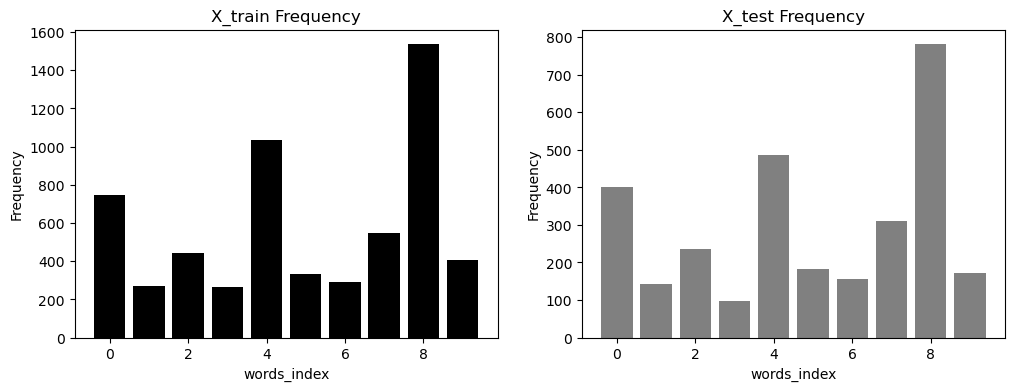

In [136]:
import matplotlib.pyplot as plt
def X_freq(data,w2i):
    freq = []
    
    for i in range(len(word_val)):
        count = 0
        for j in range(len(data)):

            count += data[j][i] 
        freq.append(count)
    return freq    

word_val = w2i.values()        

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

########### X_train frequency plots ##########
axs[1].bar(word_val,X_freq(X_test,word_val), color ='grey')
axs[1].set_title("X_test Frequency")
axs[1].set_xlabel("words_index")
axs[1].set_ylabel("Frequency")
# plt.show()
######## X_test frequency plots #########
axs[0].bar(word_val,X_freq(X_train,word_val),color="black")
axs[0].set_title("X_train Frequency")
axs[0].set_xlabel("words_index")
axs[0].set_ylabel("Frequency")

plt.show()